## Marketing campaign dataset - A/B testing, hypothesis testing

#### Below are all the features in the dataset:

Campaign Name: The name of the campaign
Date: Date of the record
- Spend: Amount spent on the campaign in dollars
of Impressions: Number of impressions the ad crossed through the campaign
- Reach: The number of unique impressions received in the ad
- No. of Website Clicks: Number of website clicks received through the ads
- No. of Searches: Number of users who performed searches on the website
- No. of View Content: Number of users who viewed content and products on the website
- No. of Add to Cart: Number of users who added products to the cart
- No. of Purchase: Number of purchases

Two campaigns were performed by the company:
- Control Campaign
- Test Campaign

The objective is to conduct data cleaning, EDA of the dataset following statistitical tests and conduction A/B test for a new marketing campaign and answer the question whether a newly launched marketing campaign was effective?


### 1. Loading necessary libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [41]:
df_control = pd.read_csv(r"C:\Users\zyesn\Documents\Python\AB_testing\Data\control_group.csv", delimiter = ';')
df_test = pd.read_csv(r"C:\Users\zyesn\Documents\Python\AB_testing\Data\test_group.csv", delimiter = ';')

In [42]:
df_control.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_test.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


#### 2. Understanding the data, data processing


In [44]:
df_control.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [45]:
df_test.dtypes

Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object

In [46]:
df_control.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [47]:
df_test.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [48]:
df_control.loc[df_control.isna().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#For the purpose of our analysis, let's replace NaN value in control group dataframe with previous value

df_control = df_control.fillna(method = 'ffill')

C:\Users\zyesn\AppData\Local\Temp\ipykernel_20880\3647476810.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_control = df_control.fillna(method = 'ffill')


In [50]:
# converting control df # to int format to unify the format between two dfs

df_control[['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']] = df_control[['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']].astype(int)

In [51]:
# looking for duplicates
# identified row where we've used fillna method to fill nan values
df_control.loc[df_control.duplicated()]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase


In [52]:
# looking for duplicates

df_test.loc[df_test.duplicated()]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase


In [53]:
#concatinating two dataframe into one
df_concat = pd.concat([df_control,df_test])

In [54]:
df_concat.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

### 3. Performing an EDA

In [55]:
df_concat.sample(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
13,Control Campaign,14.08.2019,1875,145248,118632,4521,1209,1149,1339,788
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
19,Control Campaign,20.08.2019,2675,113430,78625,2578,1001,848,1709,299
24,Control Campaign,25.08.2019,1962,117006,100398,4234,2423,2096,883,386
15,Control Campaign,16.08.2019,2024,71274,42859,5224,2427,2158,1613,438


3.1 Understand distribution of features between control and test groups

In [56]:
column_list = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks','# of Searches', '# of View Content',  '# of Add to Cart', '# of Purchase']

C:\Users\zyesn\AppData\Local\Temp\ipykernel_20880\2759830607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_concat, x='Campaign Name', y=col_name, palette='viridis', width=0.6, fliersize=5, ax=axes[id])
C:\Users\zyesn\AppData\Local\Temp\ipykernel_20880\2759830607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_concat, x='Campaign Name', y=col_name, palette='viridis', width=0.6, fliersize=5, ax=axes[id])
C:\Users\zyesn\AppData\Local\Temp\ipykernel_20880\2759830607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(da

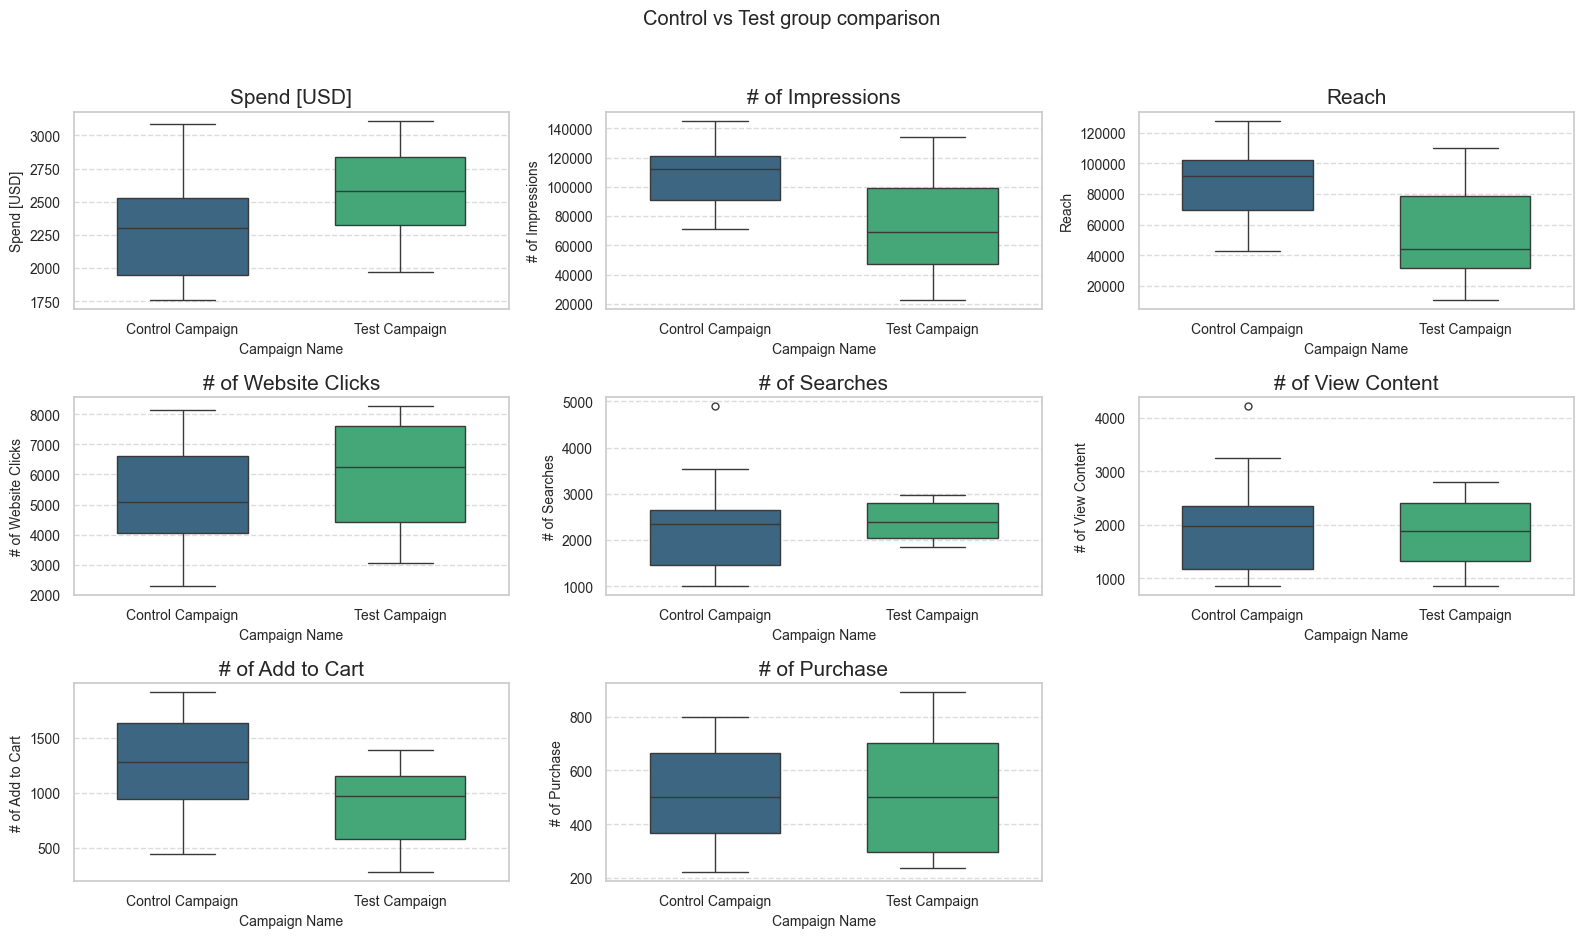

In [57]:
fig, axes = plt.subplots(4,3, figsize = (16,12))
fig.suptitle('Control vs Test group comparison')
axes = axes.flatten()

for id, col_name in enumerate(column_list):
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=df_concat, x='Campaign Name', y=col_name, palette='viridis', width=0.6, fliersize=5, ax=axes[id])
    axes[id].set_xlabel('Campaign Name', fontsize=10)
    axes[id].set_ylabel(f'{col_name}', fontsize=10)
    axes[id].set_title(f'{col_name}', fontsize=15)
    axes[id].tick_params(axis='x', labelsize=10)
    axes[id].tick_params(axis='y', labelsize=10)
    axes[id].grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots
for idx in range(len(column_list), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key insights:

- Higher Spend and Website Clicks for Test Campaign
The Test Campaign generally has a higher median spend compared to the Control Campaign.
This is also reflected in the number of Website Clicks, where the Test Campaign has slightly more clicks compared to the Control Campaign.
This suggests that the increased spend in the Test Campaign might be driving more user interaction on the website.
- Higher Reach for Control Campaign
The Reach metric is notably higher for the Control Campaign compared to the Test Campaign, indicating that the Control Campaign was able to reach more individuals despite having lower spending.
This could imply that the strategy for the Control Campaign might be more efficient in terms of audience outreach or has better audience targeting.
- Lower Engagement Metrics for Test Campaign
For engagement metrics like Add to Cart and View Content, the Control Campaign generally shows higher medians compared to the Test Campaign.
Even though the Test Campaign has a higher spend, its ability to drive deeper user actions (e.g., adding to cart) appears to be weaker.
This indicates that while spending more might generate clicks, it does not necessarily lead to higher engagement down the funnel, and optimizing content or targeting could be needed to increase conversions.
-  From correlation graphs it's seen that spending shows minimal impact on key outcomes like purchases and conversions, highlighting inefficiency in budget allocation

### 3. Creation of relevant features for upcoming hypothesis tests

##### 1. Click-Through Rate (CTR): Measures the percentage of ad impressions that resulted in clicks to your website.
- CTR (%) = (Number of Website Clicks / Number of Impressions) * 100

##### 2. Conversion Rate: Rate: Represents the percentage ad impressions that converted to purchases.
- Conversion Rate (%) = (Number of Purchases / Number of Impressions) * 100

In [58]:
#1. Click-Through Rate (CTR) %

df_concat['Click-Through Rate %'] = 100 * df_concat['# of Website Clicks'] / df_concat['# of Impressions']

#2. Conversion Rate (%)

df_concat['Conversion Rate %'] = 100 * df_concat['# of Purchase'] / df_concat['# of Impressions']

In [59]:
#creating separate df with calculated features

df_control_features = df_concat[df_concat['Campaign Name'] == 'Control Campaign']
df_test_features = df_concat[df_concat['Campaign Name'] == 'Test Campaign']

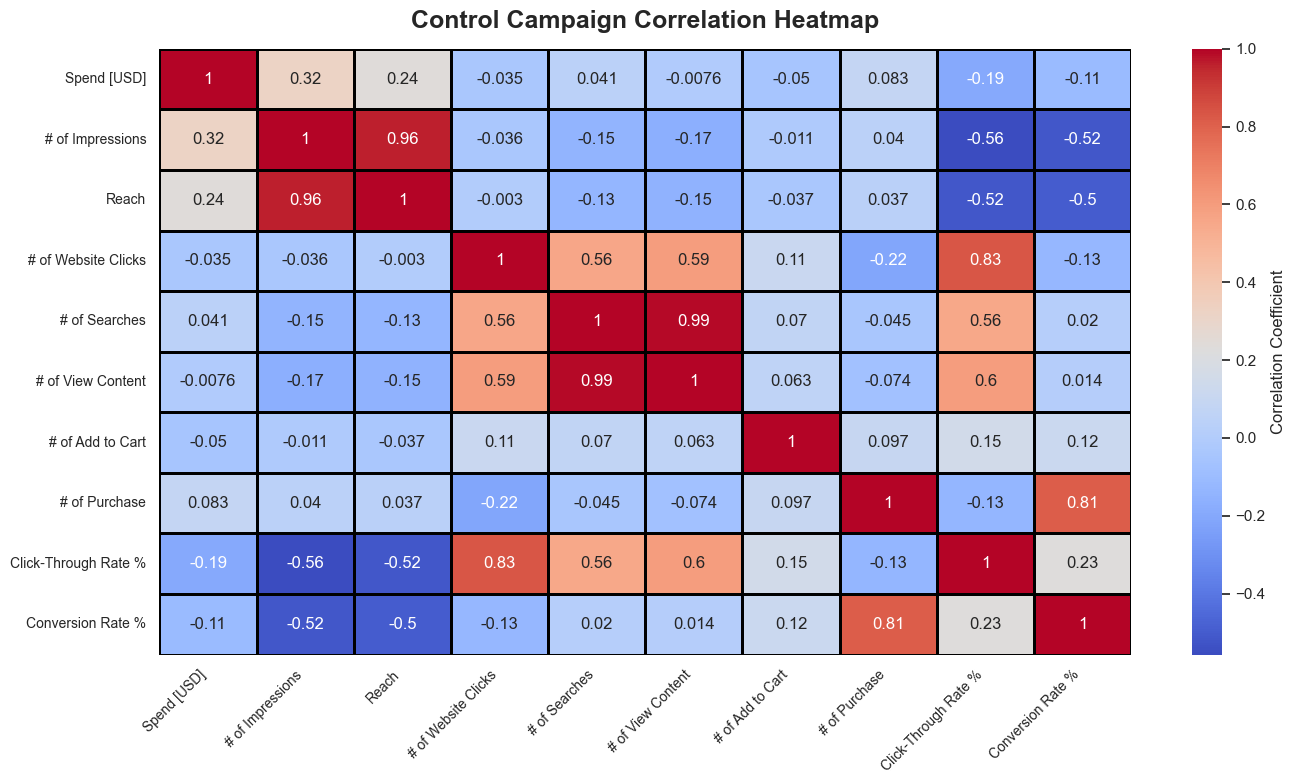

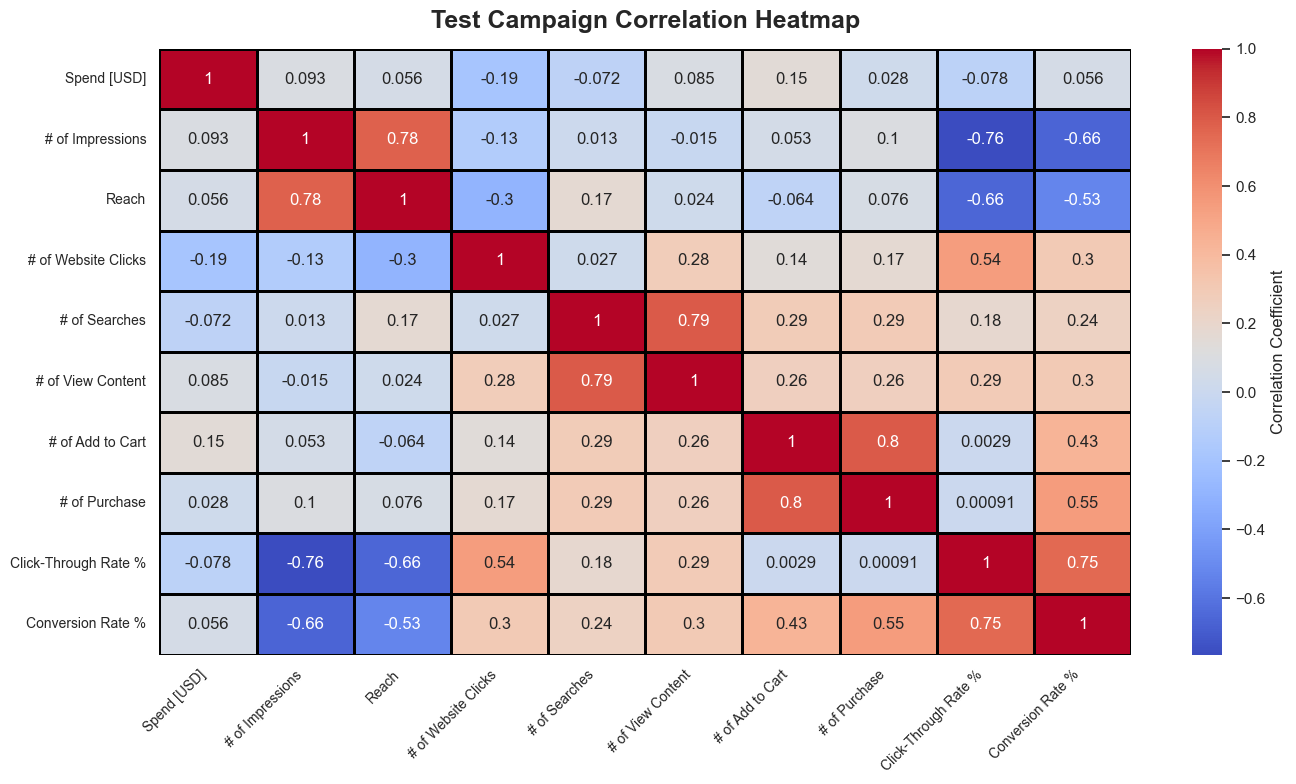

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

heatmap_params = {
    'annot': True,
    'cmap': 'coolwarm',
    'linewidths': 1,
    'linecolor': 'black',
    'cbar_kws': {'label': 'Correlation Coefficient'}
}

plt.figure(figsize=(14, 8))
control_corr = df_concat[df_concat['Campaign Name'] == 'Control Campaign'][[
    'Spend [USD]', '# of Impressions', 'Reach',
    '# of Website Clicks', '# of Searches', '# of View Content',
    '# of Add to Cart', '# of Purchase', 'Click-Through Rate %',
    'Conversion Rate %'
]].corr()

sns.heatmap(data=control_corr, **heatmap_params)
plt.title('Control Campaign Correlation Heatmap', fontsize=18, fontweight='bold', pad=15)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
test_corr = df_concat[df_concat['Campaign Name'] == 'Test Campaign'][[
    'Spend [USD]', '# of Impressions', 'Reach',
    '# of Website Clicks', '# of Searches', '# of View Content',
    '# of Add to Cart', '# of Purchase', 'Click-Through Rate %',
    'Conversion Rate %'
]].corr()

sns.heatmap(data=test_corr, **heatmap_params)
plt.title('Test Campaign Correlation Heatmap', fontsize=18, fontweight='bold', pad=15)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### 4. Features analysis

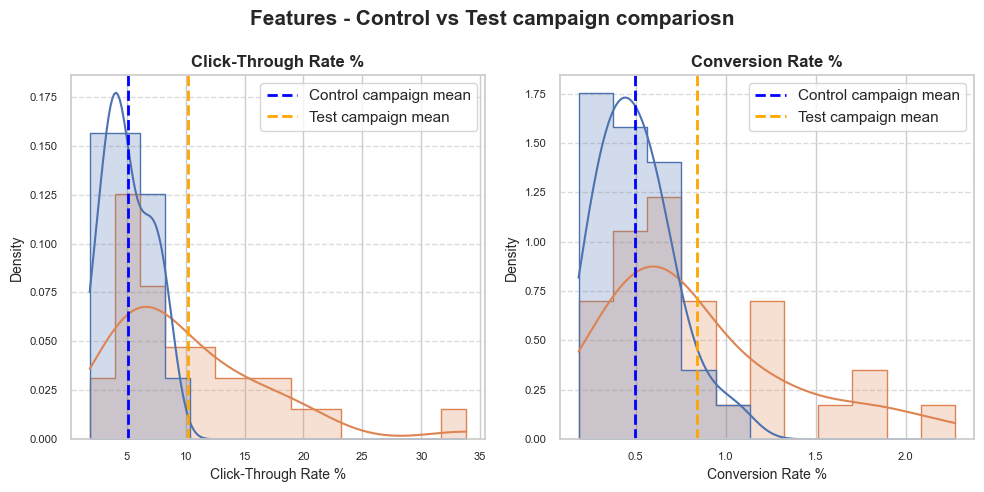

In [61]:
# Understand distribution of chosen features for both campaigns

column_list_features = ['Click-Through Rate %',
       'Conversion Rate %']

fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Features - Control vs Test campaign compariosn', fontsize=15, fontweight='bold')
axes = axes.flatten()

# Plot each feature
for id, col_name in enumerate(column_list_features):
    sns.set_theme(style="whitegrid")
    sns.histplot(data=df_concat, x=col_name, hue='Campaign Name', kde=True, ax=axes[id], 
                 element="step", stat="density", common_norm=False)
    axes[id].set_xlabel(f'{col_name}', fontsize=10)
    axes[id].set_ylabel('Density', fontsize=10)
    axes[id].set_title(f'{col_name}', fontsize=12, fontweight='semibold')
    axes[id].tick_params(axis='x', labelsize=8)
    axes[id].tick_params(axis='y', labelsize=8)
    axes[id].grid(axis='y', linestyle='--', alpha=0.7)
    axes[id].axvline(df_control_features[col_name].mean(), color='blue', linestyle='dashed', 
                    linewidth=2, label='Control campaign mean')
    axes[id].axvline(df_test_features[col_name].mean(), color='orange', linestyle='dashed', 
                    linewidth=2, label='Test campaign mean')
    axes[id].legend()
    
plt.tight_layout()
plt.show()

Interpretation: 
- The control campaign has a higher density peak around 5% CTR, indicating that most data points for the control campaign are centered around this value. On the other hand, the test campaign has a broader distribution with a peak around 7% CTR, suggesting a wider range of CTR values but with a tendency towards higher CTR.
- The control campaign shows a higher density peak around 0.5% CR, which suggests that most CR values are concentrated around this point. Conversely, the test campaign displays a broader distribution with a peak around 1% CR, indicating more variation but generally higher conversion rates.
- For both features test group performs better


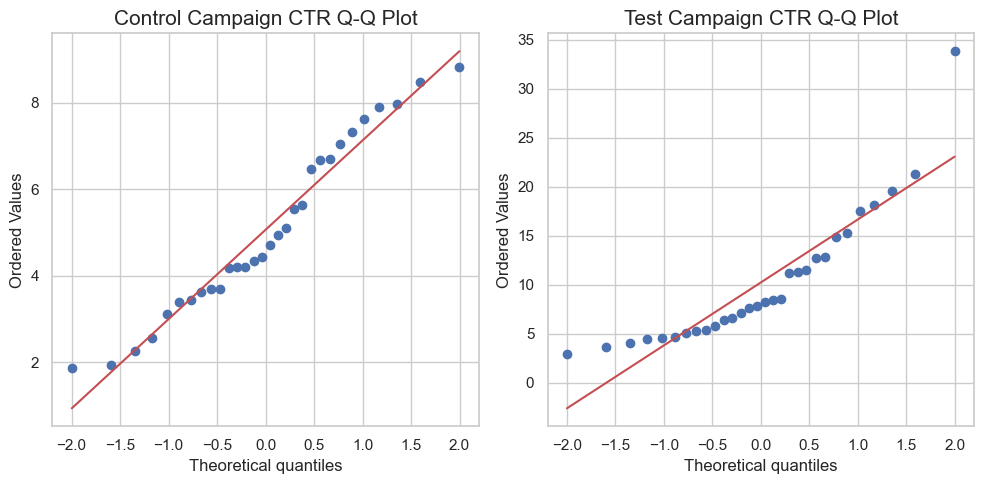

In [62]:
# Q-Q Plots

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

plt.subplot(121)
stats.probplot(df_control_features['Click-Through Rate %'], dist="norm", plot=plt, )
axes[0].set_title('Control Campaign CTR Q-Q Plot', fontsize=15)

plt.subplot(122)
stats.probplot(df_test_features['Click-Through Rate %'], dist="norm", plot=plt, )
axes[1].set_title('Test Campaign CTR Q-Q Plot', fontsize=15)

plt.tight_layout()
plt.show()

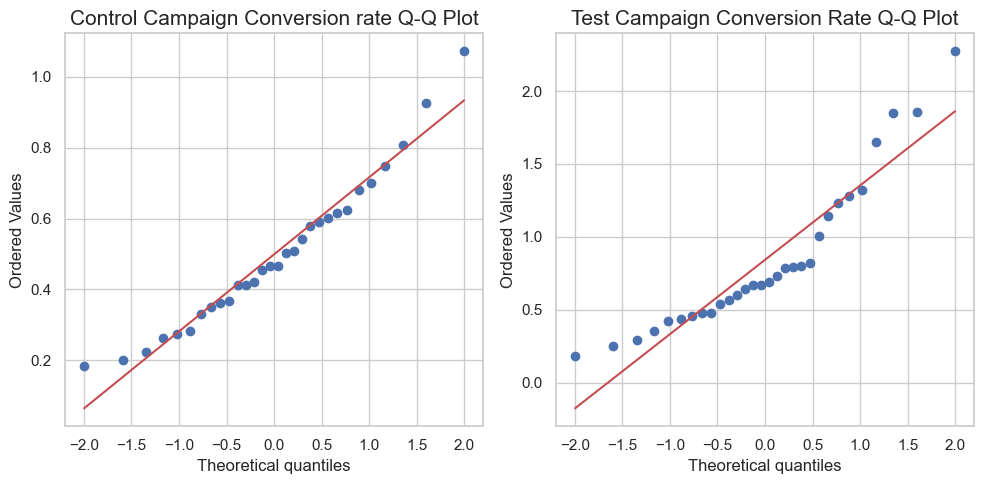

In [63]:
# Q-Q Plots

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

plt.subplot(121)
stats.probplot(df_control_features['Conversion Rate %'], dist="norm", plot=plt, )
axes[0].set_title('Control Campaign Conversion rate Q-Q Plot', fontsize=15)

plt.subplot(122)
stats.probplot(df_test_features['Conversion Rate %'], dist="norm", plot=plt, )
axes[1].set_title('Test Campaign Conversion Rate Q-Q Plot', fontsize=15)

plt.tight_layout()
plt.show()

### 5. Hypotesis testing

Deciding the Tests:
To determine the most appropriate hypothesis test for each feature, we can follow this approach:

- Check Normality:

Use the Shapiro-Wilk test to determine if the data is normally distributed.

- Check Equality of Variances:

Use Levene's Test to assess if different groups have equal variances (homogeneity of variances).

Choosing the Right Test:

Normally Distributed Data with Equal Variances:

- Test: Independent T-test.

Normally Distributed Data with Unequal Variances:

- Test: Welch's t-test.

Non-Normally Distributed Data:

- Test: Mann-Whitney U test.


#### Click-Through Rate - Design Hypothesis:
- Null Hypothesis (H0):

CTR for the Control group is not statistically significantly different from the Test group.

- Alternative Hypothesis (H1):

CTR for the Control group is statistically significantly different from the Test group.

##### 5.1.1 Normality check - Shapiro test

In [64]:
#Control group 

test_value, p_value = shapiro(df_control_features['Click-Through Rate %'])
print(f'Test statistics for Shapiro test: {test_value:.2f}')
print(f'P value is {p_value:.2f}')

# Interpretation
if p_value < 0.05:
    print("The data for the Control Campaign does not follow a normal distribution.")
else:
    print("The data for the Control Campaign follows a normal distribution.")

Test statistics for Shapiro test: 0.95
P value is 0.22
The data for the Control Campaign follows a normal distribution.


In [65]:
#Test group

test_value, p_value = shapiro(df_test_features['Click-Through Rate %'])
print(f'Test statistics for Shapiro test: {test_value:.2f}')
print(f'P value is {p_value:.2f}')

# Interpretation
if p_value < 0.05:
    print("The data for the Test Campaign does not follow a normal distribution.")
else:
    print("The data for the Test Campaign follows a normal distribution.")

Test statistics for Shapiro test: 0.84
P value is 0.00
The data for the Test Campaign does not follow a normal distribution.


##### 5.1.2 Equality check - Levene Test

In [66]:
# Perform Levene Test for CTR feature inclding control and test groups

from scipy.stats import levene

test_value, p_value = levene(df_control_features['Click-Through Rate %'], df_test_features['Click-Through Rate %'])
print(f'Levene’s test statistic: {test_value:.2f}')
print(f'P value: {p_value:.2f}')

if p_value < 0.05: 
    print("The variances are significantly different.") 
else:
    print("The variances are not significantly different.")

Levene’s test statistic: 10.25
P value: 0.00
The variances are significantly different.


##### 5.1.3 Mann Whitney U
Given the characteristics of the data the right test would be - Mann Whitney U test since there is no normal distribution and variances are not equal

In [67]:
from scipy.stats import mannwhitneyu

test_value, p_value = mannwhitneyu(df_control_features['Click-Through Rate %'], df_test_features['Click-Through Rate %'])

print(f'U test statistic: {test_value:.2f}')
print(f'P value: {p_value:.2f}')

if p_value < 0.05:
    print("There is a significant difference between the Control and Test groups.")
else:
    print("There is no significant difference between the Control and Test groups.")


U test statistic: 196.00
P value: 0.00
There is a significant difference between the Control and Test groups.


#### Conversion Rate - Design Hypothesis:

- Null Hypothesis (H0):

Conversion rate for the Control group is not statistically significantly different from the Test group.

- Alternative Hypothesis (H1):

Conversion rate for the Control group is statistically significantly different from the Test group.

##### 5.2.1 Normality check - Shapiro test


In [68]:
#Control group 

test_value, p_value = shapiro(df_control_features['Conversion Rate %'])
print(f'Test statistics for Shapiro test: {test_value:.2f}')
print(f'P value is {p_value:.2f}')

# Interpretation
if p_value < 0.05:
    print("The data for the Control Campaign does not follow a normal distribution.")
else:
    print("The data for the Control Campaign follows a normal distribution.")

Test statistics for Shapiro test: 0.96
P value is 0.26
The data for the Control Campaign follows a normal distribution.


In [69]:
#Test group

test_value, p_value = shapiro(df_test_features['Conversion Rate %'])
print(f'Test statistics for Shapiro test: {test_value:.2f}')
print(f'P value is {p_value:.2f}')

# Interpretation
if p_value < 0.05:
    print("The data for the Test Campaign does not follow a normal distribution.")
else:
    print("The data for the Test Campaign follows a normal distribution.")

Test statistics for Shapiro test: 0.88
P value is 0.00
The data for the Test Campaign does not follow a normal distribution.


##### 5.2.2 Equality check - Levene Test

In [70]:
# Perform Levene Test for CR feature inclding control and test groups

from scipy.stats import levene

test_value, p_value = levene(df_control_features['Conversion Rate %'], df_test_features['Conversion Rate %'])
print(f'Levene’s test statistic: {test_value:.2f}')
print(f'P value: {p_value:.2f}')

if p_value < 0.05: 
    print("The variances are significantly different.") 
else:
    print("The variances are not significantly different.")

Levene’s test statistic: 7.51
P value: 0.01
The variances are significantly different.


##### 5.2.3 Mann Whitney U
Given the characteristics of the data the right test would be - Mann Whitney U test since there is no normal distribution and variances are not equal

In [71]:
test_value, p_value = mannwhitneyu(df_control_features['Conversion Rate %'], df_test_features['Conversion Rate %'])

print(f'U test statistic: {test_value:.2f}')
print(f'P value: {p_value:.2f}')

if p_value < 0.05:
    print("There is a significant difference between the Control and Test groups.")
else:
    print("There is no significant difference between the Control and Test groups.")

U test statistic: 252.00
P value: 0.00
There is a significant difference between the Control and Test groups.


### 6. Interpretation of tests conducted and recommendations:

- P values for U test for both features amounted 0 implying a significant difference between test and control groups results
- Based on features analysis we see that both features demonsrtate better mean results for test group over control group implying more efficient campaign leading to better engagement with a subsequent higher conversion rate
- Despite higher add to cart metrics for control group, conversion rate for test group which can indirectly imply better efficiency of test campaign over control group campaign.
- Higher median values for purchases and webclicks indicates higher efficiency of test campaign over the control group campaign 
- Based on aforementioned results it would be better for the company to rather lean towards test group marketing campaign amid its better efficiency. However, further detailed analysis is needed to assess whether there is enough budget to sustatin such campaign (test campaign is on average 12% more expensive compared to contorl group campaign (2563 USD vs 2288 USD)
 
